In [13]:
import pandas as pd
import numpy as np

#read result_query2.csv
df = pd.read_csv('result_query2.csv', sep=',')
#calculate average of avg_meta_score avg_meta_uscore avg_igdb_score avg_igdb_uscore
df['avg_score'] = (df['avg_meta_score'] + df['avg_igdb_score'])/2
df['avg_uscore'] = (df['avg_meta_uscore'] + df['avg_igdb_uscore'])/2
df['avg_score'] = df['avg_score'].round(2)
df['avg_uscore'] = df['avg_uscore'].round(2)
df=df.drop(['avg_meta_score','avg_meta_uscore','avg_igdb_score','avg_igdb_uscore'],axis=1)


#sort by avg_score and avg_uscore
df=df.sort_values(by=['avg_score','avg_uscore'],ascending=False).reset_index(drop=True).head(5)
df

,unnested_genres,avg_gfq_rating,avg_igdb_popularity,avg_score,avg_uscore
0,RPG,3.39,3.72,71.72,67.40
1,Early Access,3.15,2.71,71.68,67.06
2,Strategy,3.41,3.26,71.65,66.20
3,Sports,3.51,1.56,71.51,64.20
4,Nudity,3.22,2.60,70.62,65.16


In [17]:
#read result_query4.csv
df2 = pd.read_csv('result_query4.csv', sep=',')
#keey genres, release_year and popularity
df2=df2[['unnested_genres','release_year','avg_igdb_popularity']]
df2.head()

,unnested_genres,release_year,avg_igdb_popularity
0,Action,1997,1.00
1,Action,1998,14.82
2,Action,1999,2.56
3,Action,2000,14.15
4,Action,2001,4.04


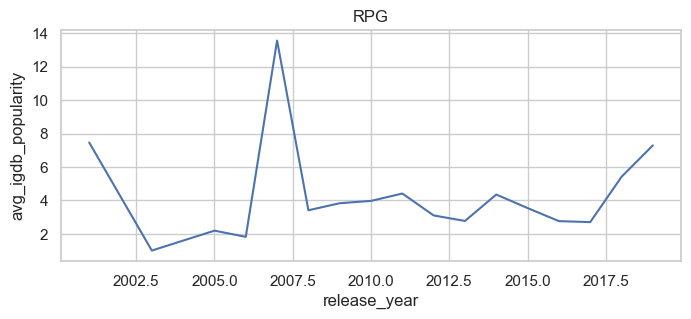

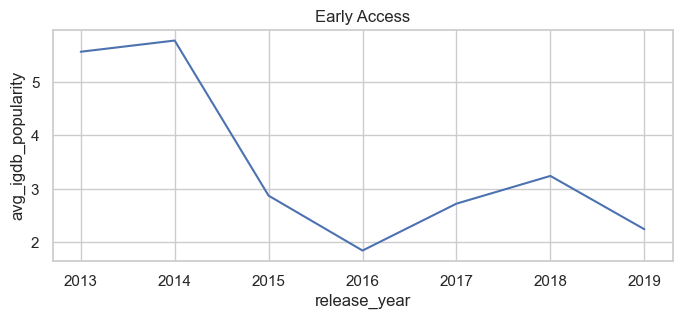

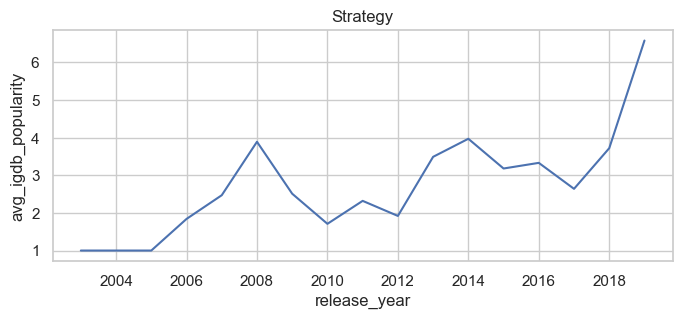

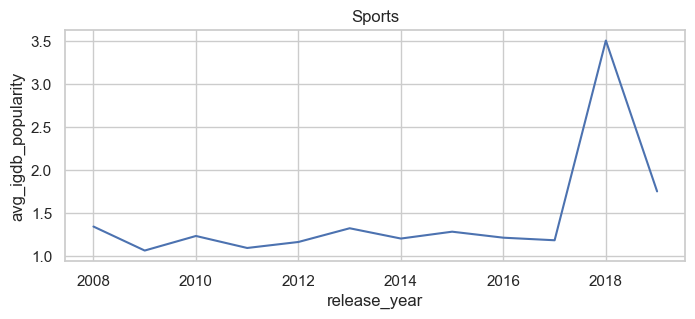

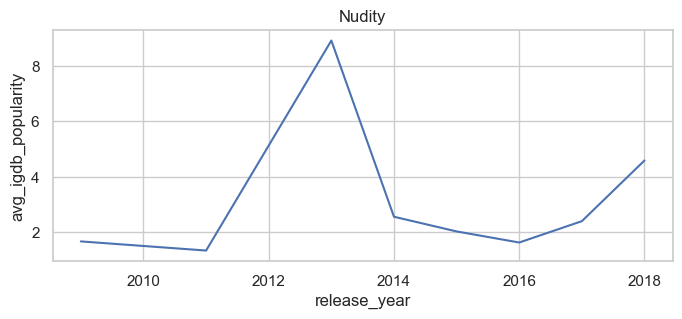

In [24]:
#draw a popularity vs release_year plot for each genre
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
genres=['RPG','Early Access','Strategy','Sports','Nudity']
#change year to int
df2['release_year']=df2['release_year'].astype(int)

for i in genres:
    df3=df2[df2['unnested_genres']==i]
    plt.figure(figsize=(8,3))
    plt.title(i)
    sns.lineplot(x="release_year", y="avg_igdb_popularity", data=df3)
    #save the plot
    plt.savefig(i+'.png')
    plt.show()



In [34]:
#read result_query5.csv
df4 = pd.read_csv('result_query5.csv', sep=',')
# Calculate average of avg_meta_score and avg_igdb_score, considering NaN values
df4['avg_score'] = df4[['avg_meta_score', 'avg_igdb_score']].mean(axis=1)

# Calculate average of avg_meta_uscore and avg_igdb_uscore, considering NaN values
df4['avg_uscore'] = df4[['avg_meta_uscore', 'avg_igdb_uscore']].mean(axis=1)

# Round the average scores to 2 decimal places
df4['avg_score'] = df4['avg_score'].round(2)
df4['avg_uscore'] = df4['avg_uscore'].round(2)

df4=df4.drop(['avg_meta_score','avg_meta_uscore','avg_igdb_score','avg_igdb_uscore'],axis=1)
#sort by avg_score and avg_uscore
df4=df4.sort_values(by=['avg_score','avg_uscore'],ascending=False).reset_index(drop=True)
df4.head(5)

,unnested_developer,num_games,avg_gfq_rating,avg_igdb_popularity,avg_score,avg_uscore
0,InvertMouse,8,2.85,1.31,97.5,70.4
1,Gritfish,2,3.64,1.42,96.0,74.0
2,Flying Helmet Games,1,3.69,1.45,95.0,84.0
3,tobyfox,1,4.25,33.10,94.0,85.5
4,MAD Virtual Reality Studio,1,3.31,1.00,94.0,57.0
